 ## Implementação do primeiro algoritmo
 ### Diagnóstico de TEPT
 #### Modelo Logístico Binário
 Variáveis qualitativas

In [1]:
import pandas as pd
import numpy as np

# Importa as bibliotecas Pandas e Numpy.

In [2]:
df = pd.read_csv('tept.csv')
df

# Exibe dataset atribuído a df.

,id,a1,a2,a3,a4,b1,b2,b3,b4,b5,...,d5,d6,d7,e1,e2,e3,e4,e5,e6,resultado
0,30677,não,não,não,não,não,não,não,não,não,...,sim,sim,sim,não,sim,não,sim,não,sim,não
1,14558580,sim,sim,não,sim,sim,sim,sim,não,não,...,sim,não,sim,sim,sim,não,sim,não,não,sim
2,8120741,não,sim,sim,sim,sim,não,sim,sim,sim,...,sim,sim,não,sim,não,não,sim,não,sim,sim
3,6658624,não,sim,sim,não,não,sim,não,sim,sim,...,não,não,sim,não,não,não,não,não,não,não
4,788586,não,não,não,não,sim,sim,não,não,não,...,não,não,sim,sim,não,sim,não,sim,não,não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,10572169,sim,não,sim,não,não,não,não,sim,não,...,sim,sim,não,não,não,sim,não,não,sim,sim
49996,4619788,não,sim,não,não,não,sim,sim,não,não,...,não,não,não,não,não,sim,sim,não,não,sim
49997,10619387,sim,não,sim,não,não,não,sim,não,não,...,sim,sim,sim,sim,sim,sim,não,sim,sim,não
49998,8289148,não,sim,sim,sim,sim,sim,sim,não,não,...,sim,não,sim,sim,sim,sim,sim,não,não,sim


In [3]:
df['resultado'].value_counts().sort_index()

# Frequência de casos negativos e positivos de TEPT, identificados como não e sim, respectivamente.

não    21462
sim    28538
Name: resultado, dtype: int64

In [4]:
df["resultado"].value_counts(normalize=True)*100

# Percentual de casos positivos e negativos de TEPT, identificados como sim e não, respectivamente.

sim    57.076
não    42.924
Name: resultado, dtype: float64

In [5]:
df.loc[df['resultado']=='não', 'resultado'] = 0
df.loc[df['resultado']=='sim', 'resultado'] = 1

# Substitui as strings da coluna resultado por valores binários.

In [6]:
print(df['resultado'].dtype)

# Mostra o tipo da variável resultado.

object


In [7]:
df['resultado'] = df['resultado'].astype('int64')
print(df['resultado'].dtype)

# Altera o tipo da variável para número inteiro.

int64


In [8]:
dummies = pd.get_dummies(df,
                         columns=['a1', 'a2', 'a3', 'a4',
                                  'b1', 'b2', 'b3', 'b4', 'b5',
                                  'c1', 'c2',
                                  'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7',
                                  'e1', 'e2', 'e3', 'e4', 'e5', 'e6'],
                         dtype=int,
                         drop_first=True)
dummies

# Cria variáveis dummies (one-hot-encoding) utilizando a função get_dummies() do Pandas;
# As colunas passam a ser binárias e do tipo inteiros;
# 0 representa a ausência do critério diagnóstico;
# 1 representa a presença do critério diagnóstico;
# A primeira categoria de cada coluna é desconsiderada para evitar multicolinearidade.

,id,resultado,a1_sim,a2_sim,a3_sim,a4_sim,b1_sim,b2_sim,b3_sim,b4_sim,...,d4_sim,d5_sim,d6_sim,d7_sim,e1_sim,e2_sim,e3_sim,e4_sim,e5_sim,e6_sim
0,30677,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,0,1,0,1
1,14558580,1,1,1,0,1,1,1,1,0,...,0,1,0,1,1,1,0,1,0,0
2,8120741,1,0,1,1,1,1,0,1,1,...,0,1,1,0,1,0,0,1,0,1
3,6658624,0,0,1,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
4,788586,0,0,0,0,0,1,1,0,0,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,10572169,1,1,0,1,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,1
49996,4619788,1,0,1,0,0,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
49997,10619387,0,1,0,1,0,0,0,1,0,...,0,1,1,1,1,1,1,0,1,1
49998,8289148,1,0,1,1,1,1,1,1,0,...,1,1,0,1,1,1,1,1,0,0


In [9]:
X = dummies.drop(['id', 'resultado'], axis=1)
y = dummies['resultado']

# Armazena em X todas as colunas do dataset, exceto id e resultado;
# Armazena em y a coluna resultado que será utilizada como rótulo.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Importação da biblioteca que será utilizada para a criação e avaliação do modelo.

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
from scipy.special import expit

# Importa bibliotecas que serão utilizadas na visualização dos dados.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide o dataset em conjuntos de treinamento (80%) e teste (20%), considerando a definição de X e y feita anteriormente.

In [12]:
modelo = LogisticRegression()

# Define o modelo de regressão logística.

In [13]:
modelo.fit(X_train, y_train)

# Treina o modelo com os dados de treinamento.

LogisticRegression()

In [14]:
y_pred = modelo.predict(X_test)

# Faz previsões com os dados de teste e armazena o resultado (em uma array) na variável y_pred.

In [15]:
y_prob = modelo.predict_proba(X_test)[:, 1]

# Probabilidades preditas da classe 1.

In [18]:
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {acuracia}')

# Avalia e exibe a precisão do modelo treinado.

Acurácia do modelo: 0.8181


In [19]:
mc = confusion_matrix(y_test, y_pred)
print('Matriz de confusão:')
print(mc)

# Cria e exibe uma matriz de confusão (avaliação do desempenho do modelo em relação a cada classe real e prevista).

Matriz de confusão:
[[3293 1032]
 [ 787 4888]]


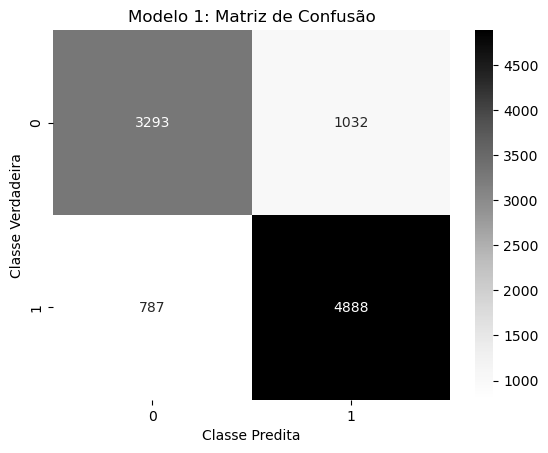

In [59]:
sns.heatmap(mc, annot=True, fmt='d', cmap='Greys')
plt.title('Modelo 1: Matriz de Confusão')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.savefig('modelo1_mc.png')
plt.show()

In [20]:
report = classification_report(y_test, y_pred)
print('Relatório de classificação:')
print(report)

# Cria e exibe um relatório de classificação com métricas de desempenho do modelo e de cada classe.

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      4325
           1       0.83      0.86      0.84      5675

    accuracy                           0.82     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.82      0.82     10000



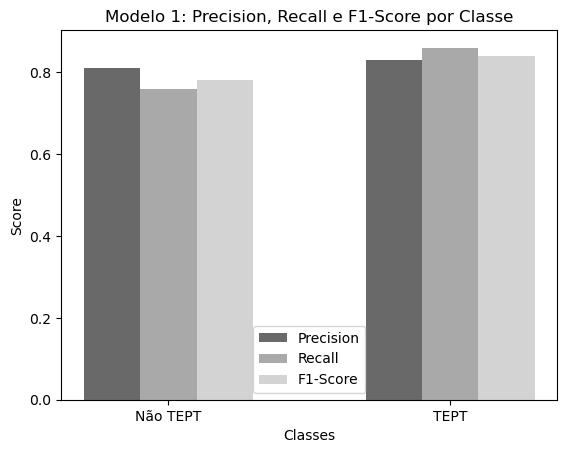

In [60]:
classes = ['Não TEPT', 'TEPT']
precision = [0.81, 0.83]
recall = [0.76, 0.86]
f1_score = [0.78, 0.84]

eixo_x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
ax.bar(eixo_x - width, precision, width, label='Precision', color='dimgrey')
ax.bar(eixo_x, recall, width, label='Recall', color='darkgrey')
ax.bar(eixo_x + width, f1_score, width, label='F1-Score', color='lightgrey')

ax.set_xlabel('Classes')
ax.set_ylabel('Score')
ax.set_title('Modelo 1: Precision, Recall e F1-Score por Classe')
ax.set_xticks(eixo_x)
ax.set_xticklabels(classes)
ax.legend()

plt.savefig('modelo1_metricas.png')
plt.show()

# Cria um gráfico de barras com as métricas obtidas no relatório de classificação.

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcula curva ROC.

In [17]:
roc_auc = auc(fpr, tpr)

# Calcula AUC.

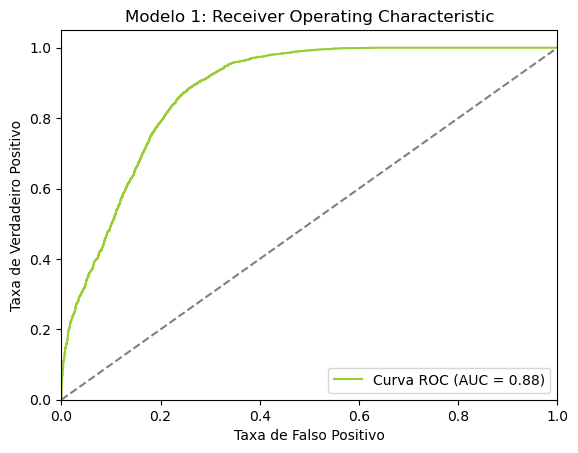

In [61]:
plt.figure()
plt.plot(fpr, tpr, color='yellowgreen', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Modelo 1: Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('modelo1_roc.png')
plt.show()

# Visualização da curva ROC.

In [21]:
y_pred2 = (y_prob >= 0.60).astype(int)

# Cutoff de 0,60.

In [22]:
acuracia2 = accuracy_score(y_test, y_pred2)
print(f'Acurácia do modelo: {acuracia2}')

# Avalia e exibe a precisão do modelo treinado para cutoff de 0,60.

Acurácia do modelo: 0.7877


In [23]:
y_pred3 = (y_prob >= 0.70).astype(int)

# Cutoff de 0,70.

In [24]:
acuracia3 = accuracy_score(y_test, y_pred3)
print(f'Acurácia do modelo: {acuracia3}')

# Avalia e exibe a precisão do modelo treinado para cutoff de 0,70.

Acurácia do modelo: 0.742


In [25]:
print(f'Intercepto do modelo: {modelo.intercept_}')

Intercepto do modelo: [-7.27017371]


In [26]:
print(f'Coeficientes do modelo: {modelo.coef_}')

Coeficientes do modelo: [[0.48689938 0.56088679 0.54876284 0.56419239 0.21672806 0.23483351
  0.24919743 0.22111308 0.26223404 2.5097258  2.50479687 0.4172121
  0.46047366 0.44855806 0.38223469 0.39238823 0.38473426 0.43968777
  0.69334235 0.72231164 0.74426992 0.71070522 0.677436   0.6961613 ]]


In [27]:
print(f'Probabilidades preditas: {y_prob}')

Probabilidades preditas: [0.49421077 0.15077198 0.45338431 ... 0.10442715 0.71100171 0.88668574]


In [62]:
import statsmodels.api as sm

# Importa a biblioteca Statsmodels.

In [63]:
X_train_sm = sm.add_constant(X_train)

# Adiciona uma constante (intercepto) ao modelo.

In [64]:
modelo_sm = sm.Logit(y_train, X_train_sm).fit()

# Treino do modelo utilizando Statsmodels.

Optimization terminated successfully.
         Current function value: 0.429291
         Iterations 7


In [31]:
print(modelo_sm.summary())

                           Logit Regression Results                           
Dep. Variable:              resultado   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39975
Method:                           MLE   Df Model:                           24
Date:                Thu, 12 Sep 2024   Pseudo R-squ.:                  0.3713
Time:                        08:42:08   Log-Likelihood:                -17172.
converged:                       True   LL-Null:                       -27315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.2841      0.089    -82.107      0.000      -7.458      -7.110
a1_sim         0.4878      0.027     18.056      0.000       0.435       0.541
a2_sim         0.5620      0.027     20.752      0.0